In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import astropy
from astropy.stats import mad_std
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import scipy
from scipy import ndimage

In [2]:
bias1= astropy.io.fits.open('Bias_1x1_00001598.fit')
bias2= astropy.io.fits.open('Bias_1x1_00001599.fit')
bias3= astropy.io.fits.open('Bias_1x1_00001600.fit')
bias4= astropy.io.fits.open('Bias_1x1_00001601.fit')
bias5= astropy.io.fits.open('Bias_1x1_00001602.fit')
bias6= astropy.io.fits.open('Bias_1x1_00001603.fit')
bias7= astropy.io.fits.open('Bias_1x1_00001604.fit')
bias8= astropy.io.fits.open('Bias_1x1_00001605.fit')
bias9= astropy.io.fits.open('Bias_1x1_00001606.fit')

darkV1= astropy.io.fits.open('DARK_100sec_B11-001.fit')
darkV2= astropy.io.fits.open('DARK_100sec_B11-002.fit')
darkV3= astropy.io.fits.open('DARK_100sec_B11-003.fit')
darkV4= astropy.io.fits.open('DARK_100sec_B11-004.fit')
darkV5= astropy.io.fits.open('DARK_100sec_B11-005.fit')

flatV1 = astropy.io.fits.open('FLAT_V_B11-001.fit')
flatV2 = astropy.io.fits.open('FLAT_V_B11-002.fit')
flatV3 = astropy.io.fits.open('FLAT_V_B11-003.fit')
flatV4 = astropy.io.fits.open('FLAT_V_B11-004.fit')
flatV5 = astropy.io.fits.open('FLAT_V_B11-005.fit')

darkB1= astropy.io.fits.open('DARK_250sec_B11-001.fit')
darkB2= astropy.io.fits.open('DARK_250sec_B11-002.fit')
darkB3= astropy.io.fits.open('DARK_250sec_B11-003.fit')
darkB4= astropy.io.fits.open('DARK_250sec_B11-004.fit')
darkB5= astropy.io.fits.open('DARK_250sec_B11-005.fit')

flatB1 = astropy.io.fits.open('FLAT_B_B11-001.fit')
flatB2 = astropy.io.fits.open('FLAT_B_B11-002.fit')
flatB3 = astropy.io.fits.open('FLAT_B_B11-003.fit')
flatB4 = astropy.io.fits.open('FLAT_B_B11-004.fit')
flatB5 = astropy.io.fits.open('FLAT_B_B11-005.fit')


In [3]:
#Master BIAS
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)

#DARK V
dark_Vlist= np.array([darkV1[0].data, darkV2[0].data, darkV3[0].data, darkV4[0].data, darkV5[0].data])

#DARK B
dark_Blist= np.array([darkB1[0].data, darkB2[0].data, darkB3[0].data, darkB4[0].data, darkB5[0].data])

#Master DARK V
masterV_dark = np.median(dark_Vlist, axis = 0)

#Master DARK B
masterB_dark = np.median(dark_Blist, axis = 0)

#FLAT V y B

flatVlist = np.mean(np.array([flatV1[0].data, flatV2[0].data, flatV3[0].data, flatV4[0].data, flatV5[0].data]), axis=0)

flatBlist = np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data, flatB4[0].data,flatB5[0].data]), axis = 0)

#MASTER FLAT V y B

master_flatV = (flatVlist -masterV_dark)/(np.median(flatVlist - masterV_dark))

master_flatB = (flatBlist -masterB_dark)/(np.median(flatBlist - masterB_dark))

#Pequeño arreglo
master_flatB[master_flatB==0]=0.0001
master_flatV[master_flatV==0]=0.0001

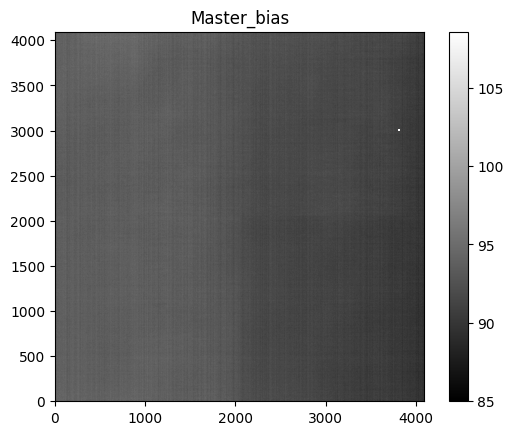

<Figure size 640x480 with 0 Axes>

In [4]:
plt.imshow(master_bias, cmap='gray', vmin=85, vmax=np.mean(master_bias)+np.std(master_bias), origin= 'lower')
plt.title('Master_bias')
plt.colorbar()
plt.show()
plt.savefig('Master_bias')

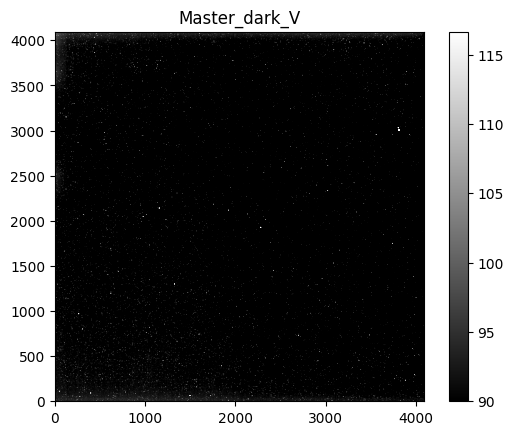

<Figure size 640x480 with 0 Axes>

In [5]:
plt.imshow(masterV_dark, cmap='gray', vmin=90, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master_dark_V')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_V normalizado')

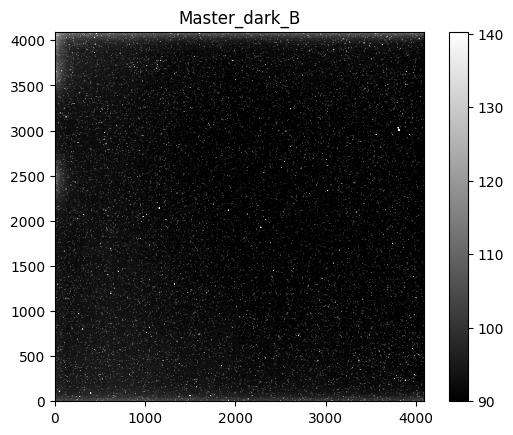

<Figure size 640x480 with 0 Axes>

In [6]:
plt.imshow(masterB_dark, cmap='gray', vmin=90, vmax=np.mean(masterB_dark)+np.std(masterB_dark), origin= 'lower')
plt.title('Master_dark_B')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_B normalizado')

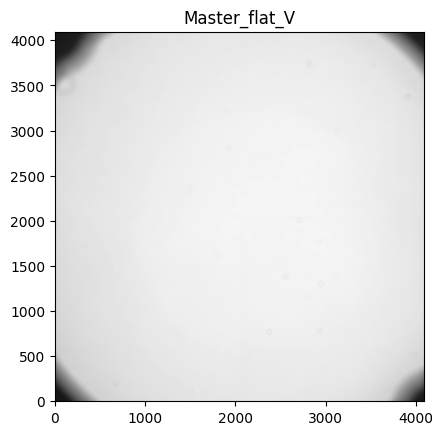

<Figure size 640x480 with 0 Axes>

In [7]:
plt.imshow(master_flatV, cmap='gray', vmin=0, vmax=np.mean(master_flatV)+np.std(master_flatV), origin='lower')
plt.title('Master_flat_V')
plt.show()
plt.savefig('Master_flat_V normalizado')

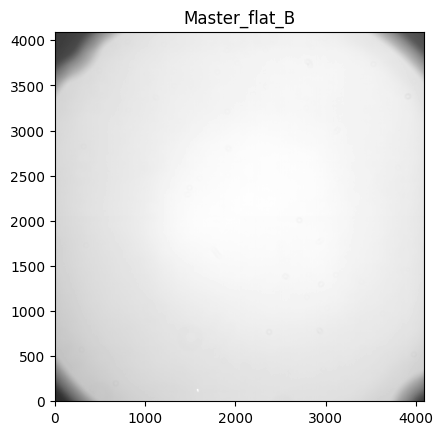

<Figure size 640x480 with 0 Axes>

In [8]:
plt.imshow(master_flatB, cmap='gray', vmin=0, vmax=np.mean(master_flatB)+np.std(master_flatB), origin='lower')
plt.title('Master_flat_B')
plt.show()
plt.savefig('Master_flat_B normalizado')

In [9]:
#Abrimos las imágenes de la nebulosa
B1= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001338.fit')
B1d= B1[0].data
    
B2= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001339.fit')
B2d= B2[0].data

B3= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001340.fit')
B3d= B3[0].data

V1= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001334.fit')
V1d= V1[0].data

V2= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001335.fit')
V2d= V2[0].data
    
V3= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001336.fit')
V3d= V3[0].data

In [10]:
BR1=(B1d-masterB_dark)/(master_flatB)

BR2=(B2d-masterB_dark)/(master_flatB)

BR3=(B3d-masterB_dark)/(master_flatB)

VR1 = (V1d - masterV_dark)/(master_flatV)

VR2 = (V2d - masterV_dark)/(master_flatV)

VR3 = (V3d - masterV_dark)/(master_flatV)

In [11]:
B = np.median(np.array([BR1,BR2,BR3]),axis=0)
V = np.median(np.array([VR1,VR2,VR3]),axis=0)

B[B < 0] = 0
V[V <0] = 0

B_raw = np.median(np.array([B1[0].data, B2[0].data, B3[0].data]), axis=0)
V_raw = np.median(np.array([V1[0].data, V2[0].data, V3[0].data]), axis=0)

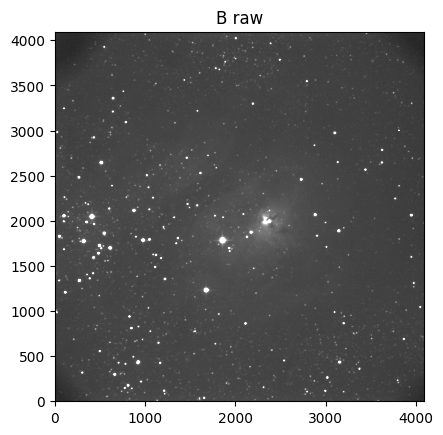

In [12]:
plt.imshow(B_raw, cmap='gray', vmin=0, vmax= np.mean(B_raw)+ np.std(B_raw), origin='lower')
plt.title('B raw')
plt.show()
#plt.savefig('B raw')
plt.close()

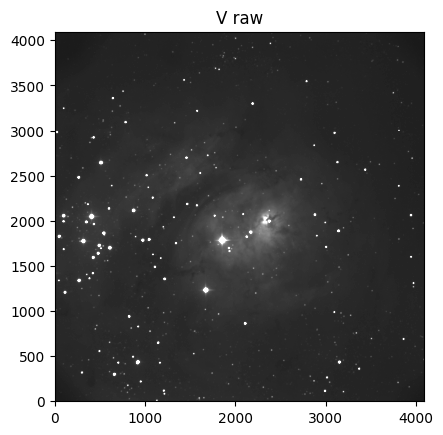

In [13]:
plt.imshow(V_raw, cmap='gray', vmin=0, vmax= np.mean(V_raw)+ np.std(V_raw), origin='lower')
plt.title('V raw')
plt.show()
#plt.savefig('V raw')
plt.close()

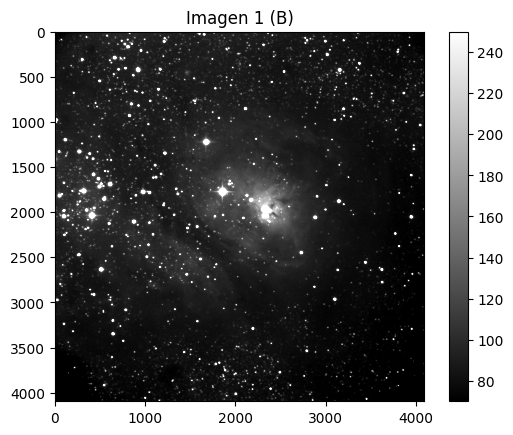

In [14]:
plt.imshow(B,cmap='gray',vmin=70, vmax=250)
plt.title('Imagen 1 (B)') 
plt.colorbar()
#plt.savefig('BR1')
plt.show()

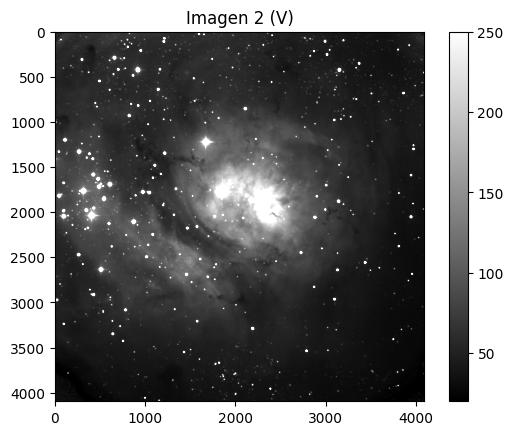

In [15]:
plt.imshow(V,cmap='gray',vmin=20, vmax=250)
plt.title('Imagen 2 (V)')
plt.colorbar()
#plt.savefig('VR1')
plt.show()

Estrellas

Estrella HIP_2465

In [56]:
#Darks estrella 1
darkHIP1_1V= astropy.io.fits.open('Dark_6.000secs_00001457.fit')
darkHIP1_2V= astropy.io.fits.open('Dark_6.000secs_00001458.fit')
darkHIP1_3V= astropy.io.fits.open('Dark_6.000secs_00001459.fit')
darkHIP1_4V= astropy.io.fits.open('Dark_6.000secs_00001460.fit')
darkHIP1_5V= astropy.io.fits.open('Dark_6.000secs_00001461.fit')

darkHIP1_1B= astropy.io.fits.open('Dark_60.000secs_00001447.fit')
darkHIP1_2B= astropy.io.fits.open('Dark_60.000secs_00001448.fit')
darkHIP1_3B= astropy.io.fits.open('Dark_60.000secs_00001449.fit')
darkHIP1_4B= astropy.io.fits.open('Dark_60.000secs_00001450.fit')
darkHIP1_5B= astropy.io.fits.open('Dark_60.000secs_00001451.fit')

In [57]:
#DARK V
darkHIP1_Vlist= np.array([darkHIP1_1V[0].data, darkHIP1_2V[0].data, darkHIP1_3V[0].data, darkHIP1_4V[0].data, darkHIP1_5V[0].data])

#DARK B
darkHIP1_Blist= np.array([darkHIP1_1B[0].data, darkHIP1_2B[0].data, darkHIP1_3B[0].data, darkHIP1_4B[0].data, darkHIP1_5B[0].data])

#Master DARK V
masterV_darkHIP1 = np.median(darkHIP1_Vlist, axis = 0)

#Master DARK B
masterB_darkHIP1 = np.median(darkHIP1_Blist, axis = 0)

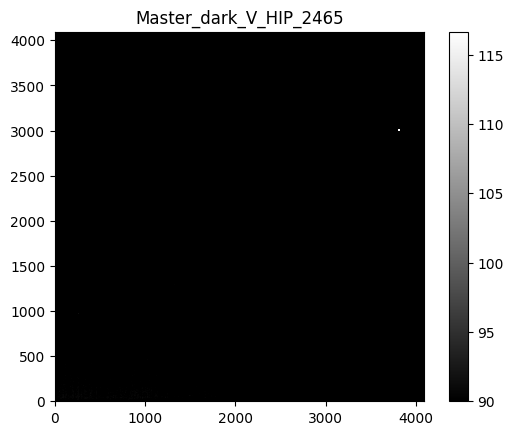

In [64]:
plt.imshow(masterV_darkHIP1, cmap='gray', vmin=90, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master dark V HIP 2465')
plt.colorbar()
plt.show()

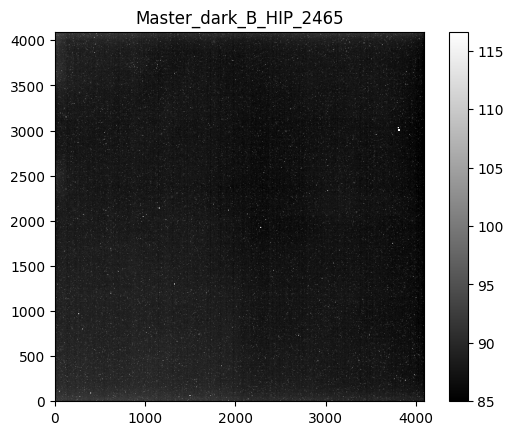

In [65]:
plt.imshow(masterB_darkHIP1, cmap='gray', vmin=85, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master dark B HIP 2465')
plt.colorbar()
plt.show()

In [67]:
B1E1= astropy.io.fits.open('Light_HIP_2465_B_60.000secs_00001389.fit')
B1E1d= B1E1[0].data

B2E1= astropy.io.fits.open('Light_HIP_2465_B_60.000secs_00001390.fit')
B2E1d= B2E1[0].data

B3E1= astropy.io.fits.open('Light_HIP_2465_B_60.000secs_00001391.fit')
B3E1d= B3E1[0].data

V1E1= astropy.io.fits.open('Light_HIP_2465_V_6.000secs_00001386.fit')
V1E1d= V1E1[0].data

V2E1= astropy.io.fits.open('Light_HIP_2465_V_6.000secs_00001387.fit')
V2E1d= V2E1[0].data

V3E1= astropy.io.fits.open('Light_HIP_2465_V_6.000secs_00001388.fit')
V3E1d= V3E1[0].data

In [68]:
BR1_E1=(B1E1d-masterB_darkHIP1)/(master_flatB)

BR2_E1=(B2E1d-masterB_darkHIP1)/(master_flatB)

BR3_E1=(B3E1d-masterB_darkHIP1)/(master_flatB)

VR1_E1 = (V1E1d - masterV_darkHIP1)/(master_flatV)

VR2_E1 = (V2E1d - masterV_darkHIP1)/(master_flatV)

VR3_E1 = (V3E1d - masterV_darkHIP1)/(master_flatV)

In [69]:
#Array foto arreglada
BE1 = np.median(np.array([BR1_E1,BR2_E1,BR3_E1]),axis=0)
VE1 = np.median(np.array([VR1_E1,VR2_E1,VR3_E1]),axis=0)

BE1[BE1 < 0] = 0
VE1[VE1 <0] = 0

#Array foto raw
B_E1raw = np.median(np.array([B1E1[0].data, B2E1[0].data, B3E1[0].data]), axis=0)
V_E1raw = np.median(np.array([V1E1[0].data, V2E1[0].data, V3E1[0].data]), axis=0)

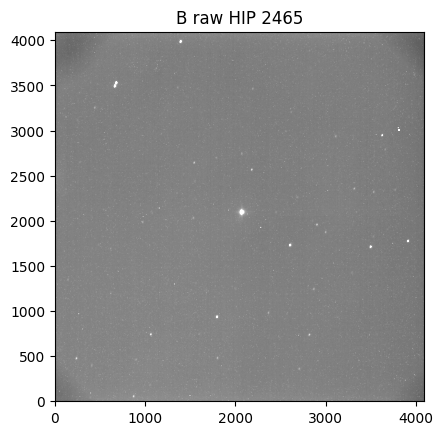

In [72]:
plt.imshow(B_E1raw, cmap='gray', vmin=60, vmax= np.mean(B_E1raw)+ np.std(B_E1raw), origin='lower')
plt.title('B raw HIP 2465')
plt.show()
#plt.savefig('B raw')
plt.close()

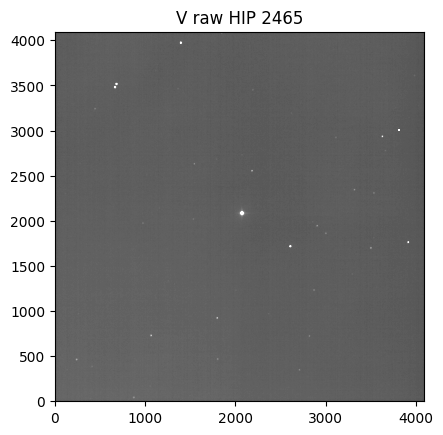

In [75]:
plt.imshow(V_E1raw, cmap='gray', vmin=60, vmax= np.mean(V_E1raw)+ np.std(V_E1raw), origin='lower')
plt.title('V raw HIP 2465')
plt.show()
#plt.savefig('V raw')
plt.close()

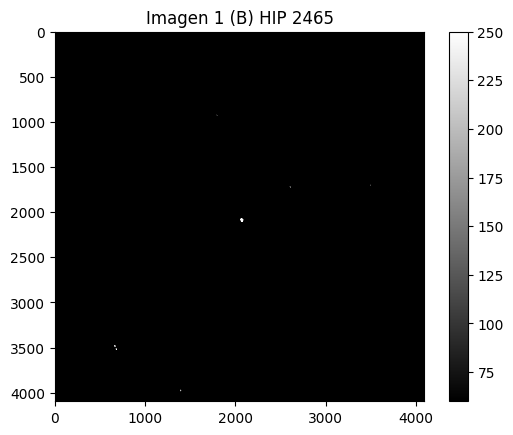

In [78]:
plt.imshow(BE1,cmap='gray',vmin=60, vmax=250)
plt.title('Imagen 1 (B) HIP 2465') 
plt.colorbar()
#plt.savefig('BR1')
plt.show()

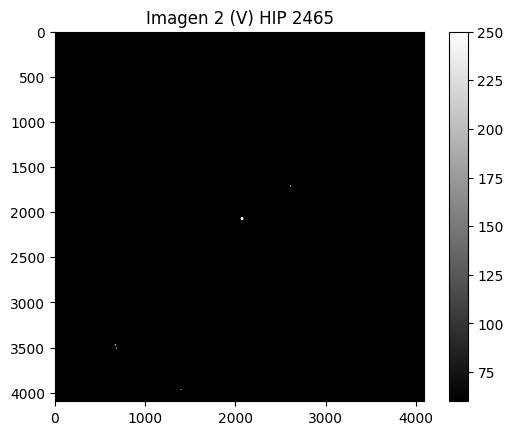

In [104]:
plt.imshow(VE1,cmap='gray',vmin=60, vmax=250)
plt.title('Imagen 2 (V) HIP 2465') 
plt.colorbar()
#plt.savefig('VR1E1')
plt.show()

# Calibración

In [81]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

### Estrella HIP 2465

Filtro B

In [83]:
dataE1= BE1
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(dataE1, nsigma=5)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(dataE1, threshold, npixels=50)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 18
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

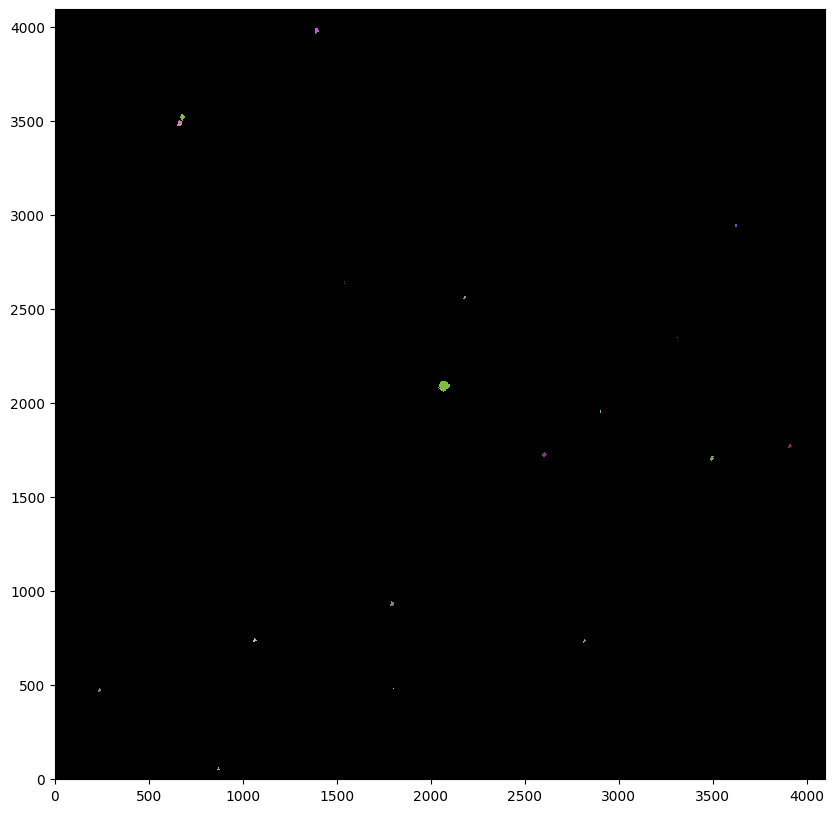

In [84]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE1 = sour.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour, origin='lower', cmap=cmap_sourE1, interpolation='nearest')
plt.show()

In [85]:
#Obtenemos el catálogo
cat = SourceCatalog(dataE1, sour)
#Lo pasamos a tabla y lo mostramos
tblE1 = cat.to_table()
tblE1

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,870.1628379914633,52.78182203469554,None,864,879,42,64,166.0,5.321141129810752,2.999206856511163,84.33897424000308,0.8260206957258959,31.614357988530752,80.87616545343755,0.0,7454.088146868954,nan,47079.754736745745,nan
2,236.8396233429783,471.94972611206026,None,228,246,461,484,208.0,5.801529981661583,3.3027724663109193,72.25314529431702,0.8221344635552329,31.746670814762712,87.9004368401893,0.0,9325.097843034002,nan,54349.52834525818,nan
3,1799.007144778809,477.36085060741914,None,1795,1805,469,486,64.0,4.4183511335139505,2.019780733651091,87.29236433645845,0.8893975767035521,31.795185982714372,55.985627985472924,0.0,2389.968855080534,nan,27685.89163626104,nan
4,2816.744906941828,735.738450499333,None,2808,2824,726,744,146.0,5.132642199826491,3.416951358066397,55.653319376179844,0.7461931548518905,31.79989368208657,126.11461469817785,0.0,6732.061865185319,nan,46800.625284455586,nan
5,1061.2319474435146,738.431719165864,None,1054,1071,728,749,208.0,5.4775687279429786,3.1518012880478095,71.63760879902094,0.8178710830025216,31.609253221173073,97.83866751384224,0.0,10855.464715580032,nan,46884.01078070377,nan
6,1792.87363339826,931.5794532360171,None,1783,1805,919,944,384.0,5.953373812278599,3.7674314178069768,69.6111939317824,0.774296550477442,31.893780957622454,320.21536157540487,0.0,40407.712339275036,nan,69808.15657394819,nan
7,3494.220851000492,1706.785731417102,None,3484,3505,1694,1719,343.0,5.877371300111683,3.544505440489919,70.3559857374019,0.79768323586629,32.04753100212267,302.2280603404342,0.0,34758.007773407226,nan,61820.51489472172,nan
8,2603.072906378681,1725.9116255049678,None,2592,2615,1712,1739,391.0,5.902474458270095,3.599716703183251,70.47549612094976,0.7925047828658224,31.756190332926824,470.89162508312194,0.0,50157.319405465074,nan,75060.59179465915,nan


In [86]:
tablaE1 = tblE1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tablaE1

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,870.1628379914633,52.78182203469554,166.0,7454.088146868954
2,236.8396233429783,471.94972611206026,208.0,9325.097843034002
3,1799.007144778809,477.36085060741914,64.0,2389.968855080534
4,2816.744906941828,735.738450499333,146.0,6732.061865185319
5,1061.2319474435146,738.431719165864,208.0,10855.464715580032
6,1792.87363339826,931.5794532360171,384.0,40407.712339275036
7,3494.220851000492,1706.785731417102,343.0,34758.007773407226
8,2603.072906378681,1725.9116255049678,391.0,50157.319405465074


In [87]:
#Dividimos el "flujo" por el tiempo de exposición (para obtener de verdad el flujo xd)
tablaE1['segment_flux'] = tablaE1['segment_flux']/60
tablaE1

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,870.1628379914633,52.78182203469554,166.0,124.2348024478159
2,236.8396233429783,471.94972611206026,208.0,155.41829738390004
3,1799.007144778809,477.36085060741914,64.0,39.832814251342235
4,2816.744906941828,735.738450499333,146.0,112.20103108642199
5,1061.2319474435146,738.431719165864,208.0,180.92441192633387
6,1792.87363339826,931.5794532360171,384.0,673.4618723212506
7,3494.220851000492,1706.785731417102,343.0,579.300129556787
8,2603.072906378681,1725.9116255049678,391.0,835.9553234244179


In [94]:
#Buscamos la fuente que es la estrella (mayor área)
estrella_index = np.argmax(tablaE1['area'])
#Obtenemos su flujo
flux_estrella = tablaE1['segment_flux'][estrella_index]
#Calculamos la magnitud medida
mag_1 = -2.5*np.log(flux_estrella)
#Obtenemos el zeropoint
zeropointE1_B = 7 - mag_1
#Usamos el zeropoint para obtener la magnitud calibrada
tablaE1['magnitude'] = zeropointE1_B - 2.5*np.log(tablaE1['segment_flux'])
tablaE1

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,870.1628379914633,52.78182203469554,166.0,124.2348024478159,20.765449126980386
2,236.8396233429783,471.94972611206026,208.0,155.41829738390004,20.205582047997908
3,1799.007144778809,477.36085060741914,64.0,39.832814251342235,23.609154856782762
4,2816.744906941828,735.738450499333,146.0,112.20103108642199,21.02015202804917
5,1061.2319474435146,738.431719165864,208.0,180.92441192633387,19.825684159025762
6,1792.87363339826,931.5794532360171,384.0,673.4618723212506,16.539804027473593
7,3494.220851000492,1706.785731417102,343.0,579.300129556787,16.916330730595888
8,2603.072906378681,1725.9116255049678,391.0,835.9553234244179,15.999444558019476


In [95]:
zeropointE1_B

32.82088248496149

Filtro V

In [121]:
dataE1V = VE1
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(dataE1V, nsigma=6)
#Utilizamos el umbral y la imagen para detectar fuentes
sourV = detect_sources(dataE1V, threshold, npixels=300)
#Mostramos el número de fuentes detectadas
sourV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 22
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

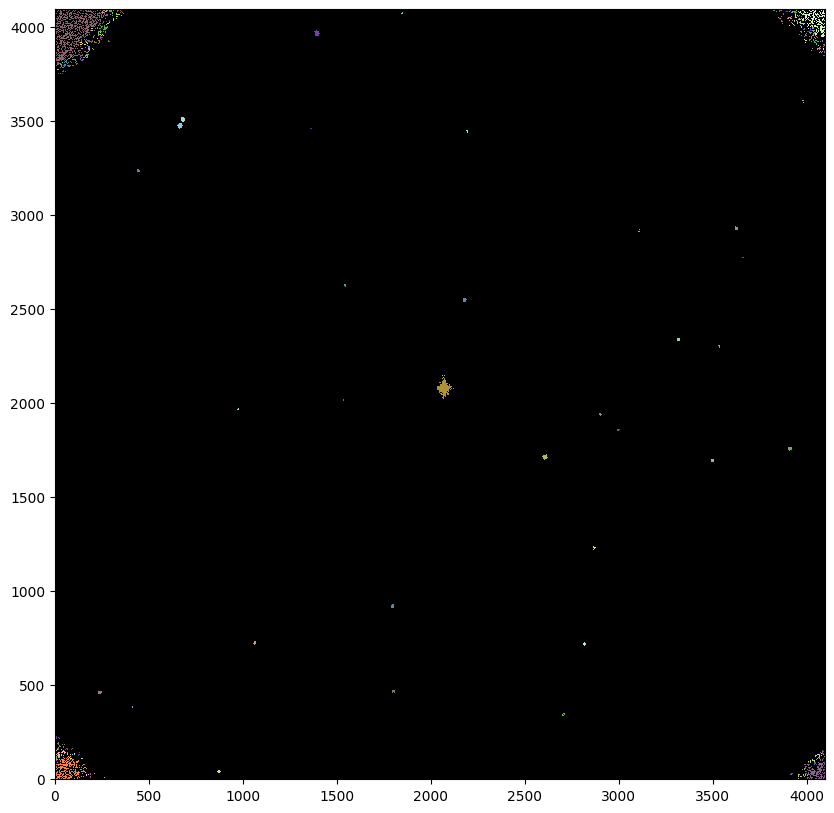

In [120]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE1_V = sourV.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourV, origin='lower', cmap=cmap_sourE1_V, interpolation='nearest')
plt.show()

In [123]:
#Obtenemos el catálogo
cat = SourceCatalog(dataE1V, sour)
#Lo pasamos a tabla y lo mostramos
tblE1 = cat.to_table()
tblE1

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,60.611499566192755,66.98900473920078,None,0,173,0,201,8929.0,52.19305338050102,36.98077841196454,-58.51260926441454,0.7056723372950304,6.469893355209187,270.26043253122145,0.0,276249.388469145,nan,531874.7234983392,nan
2,93.62793753323437,2.7927864271568126,None,80,109,0,7,73.0,7.844253016077842,1.9115138274795962,0.33046362088025355,0.9698548481763318,10.248512850129945,165.99906454630494,0.0,3148.8103968844666,nan,4284.728284272322,nan
3,156.36764574862525,2.5912988060141626,None,149,166,0,6,52.0,5.22450171098431,1.4940671042055238,-0.8420397008636505,0.9582376371348573,7.04737887212073,108.57481056149105,0.0,1563.5433704394563,nan,6517.930768895849,nan
4,212.94223240964874,7.406913722372529,None,202,227,0,14,100.0,6.964487677056313,3.22269856841061,12.905934699457354,0.8864976773178549,6.680583529411765,60.20117607146896,0.0,1888.7810188217015,nan,17449.713096776934,nan
5,261.49848877375274,6.8915073892333245,None,256,268,0,14,56.0,4.004662630696082,3.1863591124243453,77.47772599784682,0.6057404487577198,7.371351426197729,46.72564356742356,0.0,762.9061418414962,nan,8227.031554664547,nan
6,290.5096873668775,5.885730988060205,None,281,301,0,13,60.0,6.320773753781881,1.846869794602619,25.657559874053124,0.9563601490660939,6.56455312222551,23.98856354935518,0.0,661.2949895334192,nan,6152.00450829518,nan
7,3962.6767847105402,9.357677844094328,None,3949,3979,0,24,199.0,7.056752961400796,5.6117253608717705,-5.057505585078665,0.6063109103821075,7.992838321735016,99.49558827869093,0.0,4306.253133720173,nan,21199.395394537572,nan
8,4047.7124651696226,43.51941817933394,None,3973,4095,0,110,4324.0,33.3098897871255,26.429517095688503,25.90203893100239,0.6086438515802723,6.471663019693653,151.28132992327363,0.0,117368.30128035852,nan,260035.0338786786,nan


Catálogo 

In [16]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [17]:
data = B

#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(data, threshold, npixels=10)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 10531
labels: [    1     2     3     4     5 ... 10527 10528 10529 10530 10531]

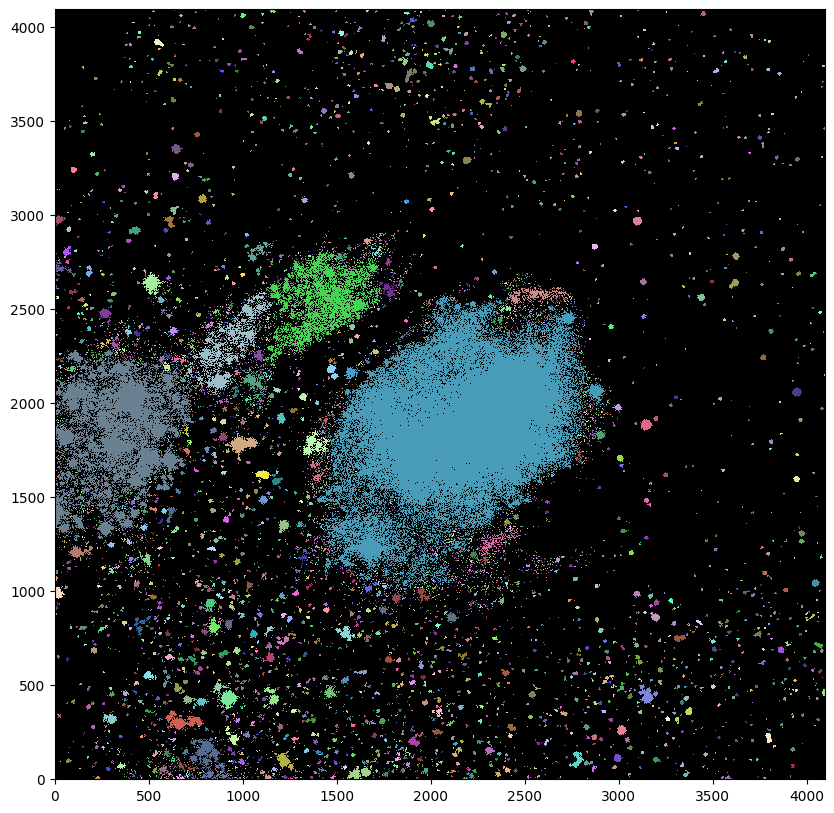

In [26]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour = sour.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour, origin='lower', cmap=cmap_sour, interpolation='nearest')
plt.show()

In [48]:
#Usamos la función mencionada para separar las fuentes
sour_deblend = deblend_sources(data, sour, npixels=10, nlevels=1 ,contrast=0)
#Mostramos el número de fuentes detectadas
sour_deblend 

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 10622
labels: [    1     2     3     4     5 ... 10618 10619 10620 10621 10622]

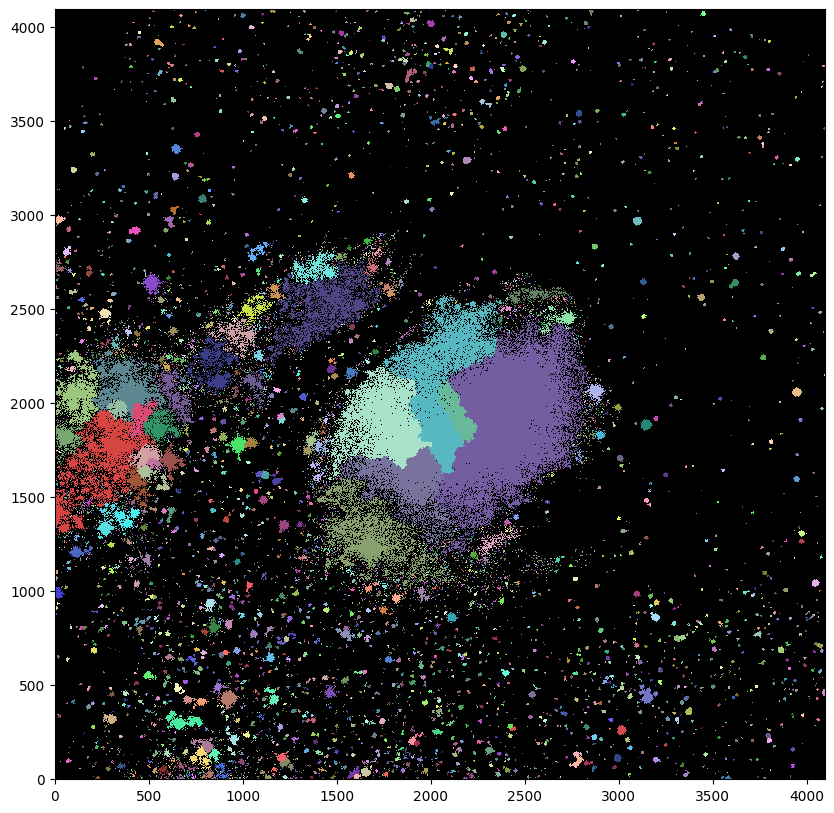

In [49]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap=cmap_deblend,interpolation='nearest')
plt.show()

In [50]:
#Obtenemos el catálogo
cat = SourceCatalog(data, sour_deblend)
#Lo pasamos a tabla y lo mostramos
tbl = cat.to_table()
tbl

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,None,212,239,0,17,301.0,6.153561415092118,3.9923355619465615,-2.333605293814162,0.7609721480685386,101.88236861031938,773.156641370307,0.0,43598.069224991894,nan,331536.18293532624,nan
2,277.23738448633287,1.1273669448202988,None,271,283,0,5,25.0,3.2638240617365417,1.281340054019558,-5.1429904684028545,0.919714198429502,103.33384845819165,147.05517517288678,0.0,2848.0356319810357,nan,55606.86484037084,nan
3,393.5670837270501,1.0894194971588487,None,390,397,0,2,13.0,2.0871024783287986,0.7848177899709256,7.8932785847635465,0.9266065860515089,101.50067267419722,127.53129005059021,0.0,1417.343131978438,nan,23335.35932016264,nan
4,458.9393446041314,3.087594773309202,None,455,462,0,8,23.0,2.4714655206569156,1.87175245321904,48.821107747509124,0.6530147829565764,101.74702137959437,491.7533574600321,0.0,2865.9088123396177,nan,59321.07853768198,nan
5,543.7830169677574,2.409318116390217,None,539,549,0,5,19.0,3.1313106409706277,1.17611222056945,-9.178393775766688,0.9267829156102796,101.49664139124701,126.52442870311968,0.0,2067.6163645256947,nan,49281.58968783585,nan
6,591.2791958654641,13.92085906421521,None,553,621,0,35,601.0,19.021839467087364,7.051718916454483,19.21930985204443,0.9287458852499866,101.48347903996525,297.60294544142715,0.0,67422.44734899836,nan,1456325.1290998287,nan
7,627.5338091227153,4.5233361874537374,None,620,635,0,11,47.0,4.239780877304602,2.7008131664329915,12.303035937085237,0.7708496221598572,101.72927946408753,118.66136629341045,0.0,5091.202543877787,nan,128410.9969151968,nan
8,664.9572332482599,7.92121109347383,None,639,689,0,29,463.0,12.152399431066597,6.396663910146887,10.586983840105756,0.8502553460197426,101.4828773097516,167.73082489146162,0.0,52500.361196304046,nan,855691.262025652,nan


In [51]:
tabla = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,43598.069224991894
2,277.23738448633287,1.1273669448202988,25.0,2848.0356319810357
3,393.5670837270501,1.0894194971588487,13.0,1417.343131978438
4,458.9393446041314,3.087594773309202,23.0,2865.9088123396177
5,543.7830169677574,2.409318116390217,19.0,2067.6163645256947
6,591.2791958654641,13.92085906421521,601.0,67422.44734899836
7,627.5338091227153,4.5233361874537374,47.0,5091.202543877787
8,664.9572332482599,7.92121109347383,463.0,52500.361196304046


In [54]:
#Dividimos el "flujo" por el tiempo de exposición
tabla['segment_flux'] = tabla['segment_flux']/250
tabla


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,174.39227689996758
2,277.23738448633287,1.1273669448202988,25.0,11.392142527924143
3,393.5670837270501,1.0894194971588487,13.0,5.669372527913752
4,458.9393446041314,3.087594773309202,23.0,11.463635249358472
5,543.7830169677574,2.409318116390217,19.0,8.270465458102779
6,591.2791958654641,13.92085906421521,601.0,269.68978939599344
7,627.5338091227153,4.5233361874537374,47.0,20.36481017551115
8,664.9572332482599,7.92121109347383,463.0,210.0014447852162


ZERO POINT ESTRELLA HIP 2465

In [92]:
#Calculamos las magnitudes aparentes usando el zeropoint
zeropointB1E1 = 32.82088248496149
tabla['magnitude'] = zeropointB1E1 - 2.5*np.log(tabla['segment_flux'])
tabla

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,174.39227689996758,19.917614418301838
2,277.23738448633287,1.1273669448202988,25.0,11.392142527924143,26.738572820409857
3,393.5670837270501,1.0894194971588487,13.0,5.669372527913752,28.483186369099325
4,458.9393446041314,3.087594773309202,23.0,11.463635249358472,26.722932802532952
5,543.7830169677574,2.409318116390217,19.0,8.270465458102779,27.539155509529486
6,591.2791958654641,13.92085906421521,601.0,269.68978939599344,18.82770155918287
7,627.5338091227153,4.5233361874537374,47.0,20.36481017551115,25.286361435104425
8,664.9572332482599,7.92121109347383,463.0,210.0014447852162,19.453096458402978


In [93]:
#Mostramos las magnitudes
np.sort(tabla['magnitude'])

1.4406356196875585
2.207657085037237
3.5780811645627466
3.8315008967238633
4.108103087995488
4.314593211686162
5.475396232375871
5.964778641469589
6.632599909024748
7.451944607208365
7.523146406616199


In [ ]:
#Finalmente obtenemos una imagen rgb a color
#rgb= make_lupton_rgb(Si,Sr,Sg,stretch=130, Q=5)
#plt.imshow(rgb[1800:2300, 1800:2300], origin='lower')
#plt.colorbar()
#plt.savefig('rgb3.png',dpi='figure')
#plt.close()









